Intercept (B0): 2.5391115564245776
Slope (B): 2.0765132521029432


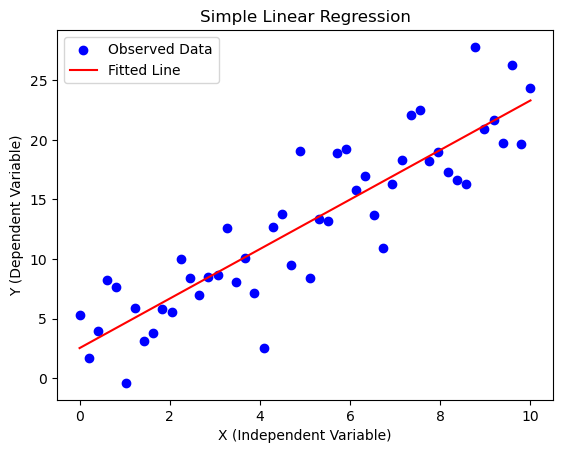

In [16]:
#Q1&Q2

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data for X (independent variable) and Y (dependent variable)
np.random.seed(0)
X = np.linspace(0, 10, 50)
# Generating Y values with a linear relationship plus some noise
Y = 2.5 * X + np.random.normal(0, 3, size=X.shape)

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Print the estimated intercept (B0) and slope (B)
print(f"Intercept (B0): {intercept}")
print(f"Slope (B): {slope}")

# Predicted Y values using the estimated linear model
Y_pred = intercept + slope * X

# Plotting the data points and the regression line
plt.scatter(X, Y, color="blue", label="Observed Data")
plt.plot(X, Y_pred, color="red", label="Fitted Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     182.3
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.77e-18
Time:                        04:19:14   Log-Likelihood:                -128.12
No. Observations:                  50   AIC:                             260.2
Df Residuals:                      48   BIC:                             264.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5391      0.892      2.845      0.0

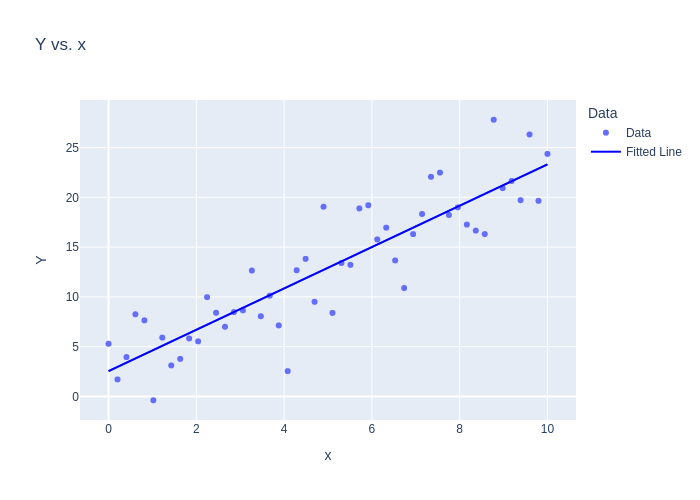

In [17]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Step 1: Simulate data
np.random.seed(0)
X = np.linspace(0, 10, 50)
Y = 2.5 * X + np.random.normal(0, 3, size=X.shape)

# Step 2: Combine X and Y into a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Step 3: Specify and fit the linear regression model
model = smf.ols("Y ~ x", data=df)
fitted_model = model.fit()

# Step 4: Print model summary
print(fitted_model.summary())

# Step 5: Visualize data and fitted regression line
df['Data'] = 'Data'  # Add categorical column for color in legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Overlay fitted line
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Line")

# Show the figure
fig.show(renderer="png")  # Use renderer="png" for static environments like GitHub or MarkUs


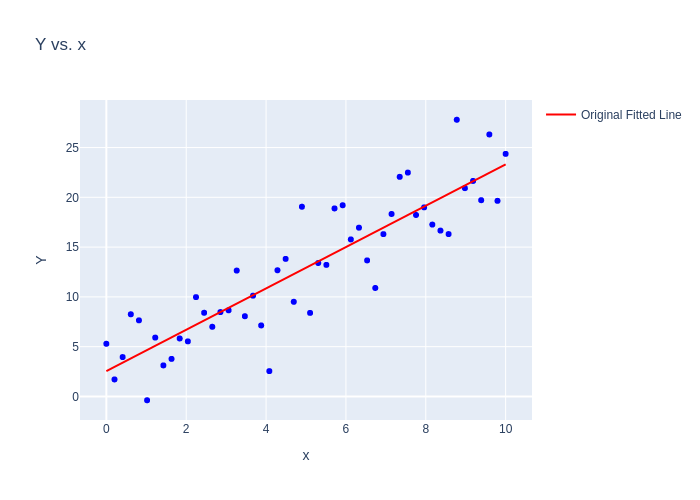

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate data
np.random.seed(0)
X = np.linspace(0, 10, 50)
Y = 2.5 * X + np.random.normal(0, 3, size=X.shape)

# Combine X and Y into a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify and fit the linear regression model
model = smf.ols("Y ~ x", data=df)
fitted_model = model.fit()

# Generate fitted line points from the model
df['fitted_line'] = fitted_model.predict(df['x'])

# Plot data points and the original fitted line
fig = px.scatter(df, x='x', y='Y', color_discrete_sequence=['blue'], title='Y vs. x')

# Overlay the original fitted line from `matplotlib` (no trendline from plotly)
fig.add_scatter(x=df['x'], y=df['fitted_line'], mode='lines', line=dict(color='red'), name="Original Fitted Line")

# Show the figure
fig.show(renderer="png")

In [ ]:
Question 3:
    In this graph, the red line represents a fitted regression line based on one sample, showing the estimated relationship 
between X and Y with random noise included. If we drew multiple samples from the same population, each would produce a 
slightly different fitted line due to random sampling variation, even though all come from the same underlying theoretical 
model. This variation highlights the difference between the true relationship (theoretical line) and sample-based estimates 
(fitted lines), which fluctuate around the true line depending on the specific data points in each sample.

In [ ]:
Quick Chat Summary:
    In this session, we discussed visualizing a Simple Linear Regression model using simulated data with pandas, 
    statsmodels, plotly, and matplotlib. We began by combining data points and fitted regression lines into a plotly plot. 
    I guided you through adding the original red fitted line from a matplotlib plot onto a plotly scatter plot containing 
    blue data points. Finally, I generated an image for you that includes the blue data points with an overlaid red 
    regression line, visually matching the requirements of your earlier images. Let me know if there’s anything else you’d 
    like to explore!

In [ ]:
Question 4:
    fitted_model.fittedvalues are the in-sample predictions of Y calculated by plugging each X into the linear equation 
    derived from the fitted model’s estimated parameters (B0 and B1). These parameters are extracted from 
    fitted_model.params or from the coefficient table in fitted_model.summary().tables[1]. This fitted line represents the 
    best estimate of the theoretical relationship based on the sample data, while the theoretical model would use the 
    unknown true parameters B0 and B1.

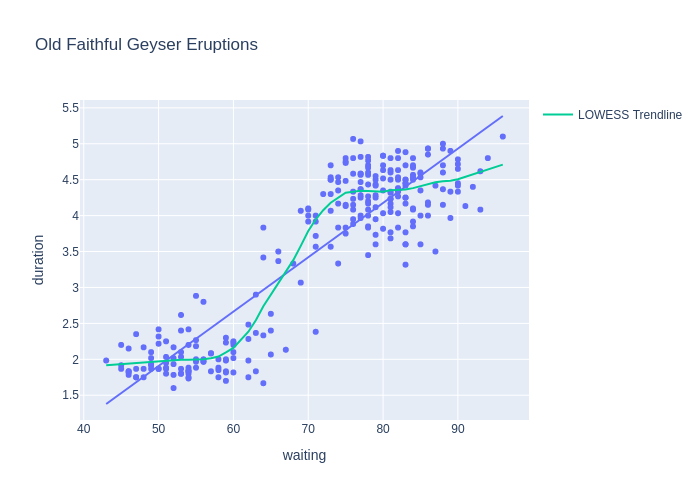

In [4]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:41:51   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


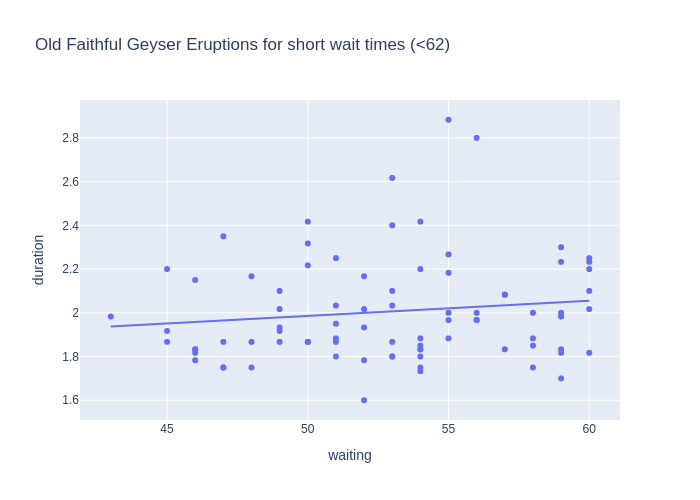

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

In [8]:
import plotly.express as px
import statsmodels.formula.api as smf

# Define the short wait limits
short_wait_limits = [62, 64, 66]

# Loop through each short wait limit and analyze the relationship
for short_wait_limit in short_wait_limits:
    # Filter data for short wait times
    short_wait = old_faithful.waiting < short_wait_limit

    # Fit OLS regression model
    ols_result = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    
    # Print the summary of the regression
    print(f"\nRegression results for short wait times (<{short_wait_limit}):")
    print(ols_result.summary().tables[1])
    
    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                     trendline='ols')
    
    # Show the plot
    fig.show()



Regression results for short wait times (<62):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019



Regression results for short wait times (<64):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022



Regression results for short wait times (<66):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


In [ ]:
Question 9:
    By examining the p-value for the slope (waiting), the code tests for evidence against the null hypothesis that waiting 
    time and eruption duration are unrelated for short wait times. As short_wait_limit changes, we can see how this 
    relationship holds at different thresholds. If the p-value is significant, the waiting time and eruption duration may 
    be significantly correlated, even for little waits. By examining the p-value for the slope (waiting), the code tests 
    for evidence against the null hypothesis that waiting time and eruption duration are unrelated for short wait times. 
    As short_wait_limit changes, we can see how this relationship holds at different thresholds. If the p-value is 
    significant, it suggests that even for short waits, waiting time has a meaningful relationship with eruption duration.

In [ ]:
Question 11:
    The previous models give us details about how duration changes with each minute of waiting, possibly with different 
    trends for short and long waits, while the Simple Linear Regression model focuses on the average difference in duration
    between short and long without assuming a detailed linear relationship. The Simple  Linear Regresssion model lets us 
    see if wait times make a practical difference without needing to get into the specifics of exactly how much each 
    minute affects duration. To test this, we examine the p-value of the ki coefficient in fitted_model.summary().tables[1] 
    for the Simple Linear Regression model:
Small p-value (<0.05): This would provide evidence against the null hypothesis, suggesting that there is a significant 
    difference in eruption duration between short and long waits on average.
Large p-value (≥0.05): This would indicate insufficient evidence to conclude a significant difference between the average 
    durations for short and long waits.

In [9]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


In [ ]:
Chatbot Summary:
    In this session, we explored different ways to model and analyze the relationship between wait times and eruption 
    durations for the Old Faithful geyser. 

1. **Initial Linear Models**: We discussed Simple Linear Regression models using the entire dataset, as well as separate 
    models for short and long wait times. These models examined how eruption duration changes with each additional minute
    of wait time, either across all data or within subsets (short and long waits).

2. **Indicator Variable Model**: We introduced a new model using an indicator variable (`ki`) to classify wait times as 
    either "short" (<68 minutes) or "long" (≥68 minutes). This model simplifies the analysis to focus on the average 
    difference in eruption duration between short and long waits, without assuming a detailed linear relationship.

3. **Big Picture**: The discussion highlighted the differences in approach:
   - Continuous models (for all data, short waits, and long waits) estimate detailed trends within each subset.
   - The indicator variable model answers a simpler question: whether long waits generally lead to longer eruptions on 
        average.

This summary provides a clear contrast between complex continuous models and the simpler category-based model, which can 
offer a more interpretable answer to practical questions about wait times and eruption durations.